#Indtroduction to Regression with Neural Networks in TensorFlow

Therea are many definitions dor a regression problem but in our case, we're goint ot simplify it:
predicting a numerical variable based on same other combination of variables, even shorter...predicting a number.

In [ ]:
#Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


###Creating data to vieew and fit


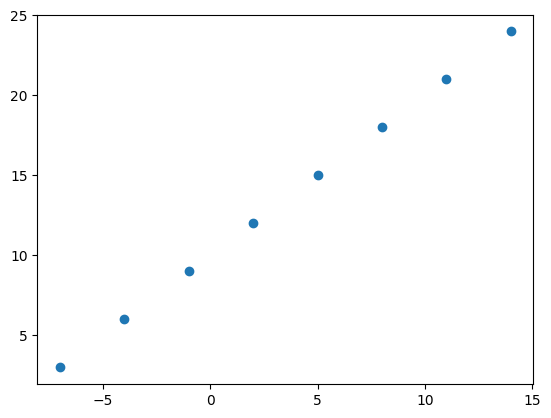

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X=np.array([-7.,-4.,-1.,2.,5.,8.,11.,14.,])

#Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0,])

#Visualize it
plt.scatter(X,y);

In [ ]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

###Input and Output shapes

In [ ]:
#Create a demo tensor for our housing price prediction problem
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
X[1],y[1]

(-4.0, 6.0)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
#Turn our NumPy arrays into tensors
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

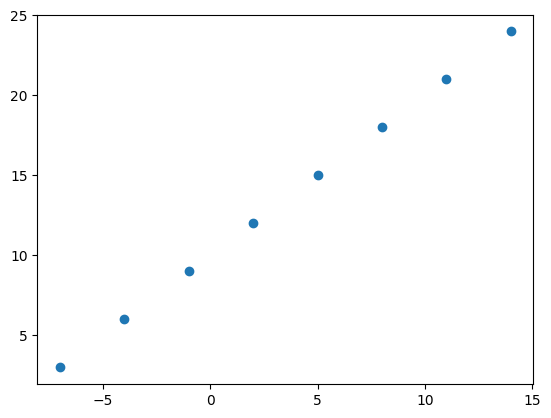

In [ ]:
plt.scatter(X,y)

##Steps in modelling with TensorFlow

1. **Creating a model**-define the input and output layers as well as hidden layers of a deep leranig model
2. **Compiling a model**-define the loss functon(in other words, the function which tells our model how wrong it is) and theoptimizer(tells our model how to improve the patterns its leraning) and eavaluation metrics (what can we use to interpret performance our models).
3. **Fitting a model**- letting the model try to find patterns betweenX and y (features and labels)

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1.Create a model using the sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model.compile(loss=tf.keras.losses.mae,#mae is mean absolute error
              optimizer=tf.keras.optimizers.SGD(),#SGD is stochastic gradient descent
              metrics=["mae"])

#3.Fit the model
model.fit(tf.expand_dims(X,axis=1),y,epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 537ms/step - loss: 15.9637 - mae: 15.9637
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 15.6825 - mae: 15.6825
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 15.4012 - mae: 15.4012
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 15.1200 - mae: 15.1200
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 14.8775 - mae: 14.8775


In [ ]:
#Check x and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#Try and make a prediction using our model
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 95ms/step


array([[-6.2012973]], dtype=float32)

###Improving Our Model

We can improve our model by altering the steps we took to create a model

1. **Creating a mode**-here *we* might add more layers, increase the number of hidden units(all callled nuerons) within each of the hidden layers, change the activation function of each layer
2. **Compiling ouur model**-here we might change the optimization function or perhaps the **learning rate** of the  optimization function
3. **Fitting our model**-here we might fit a model for more **epochs**(leave it training for more longer) (or it give more examples to learn)

In [ ]:
#Lets rebuild our model

#1.create our model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#Fit the model
model.fit(tf.expand_dims(X,axis=1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.9020 - mae: 13.9020
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 13.7695 - mae: 13.7695
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 13.6370 - mae: 13.6370
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 13.5045 - mae: 13.5045
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 13.3720 - mae: 13.3720
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 13.2395 - mae: 13.2395
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 13.1070 - mae: 13.1070
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 12.9745 - mae: 12.9745
Epoch 9/100
1/1 [==============================] - 0s 26ms/step - loss: 12.8420 - mae: 12.8420
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 12.7095 - mae: 12.7095
Epoch 11/100
1/1 [==============================] -

In [ ]:
#Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#Lets see if the prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 165ms/step


array([[29.867409]], dtype=float32)

In [ ]:
#Lets rebuild our model

#1.create our model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])
#2.Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])
#Fit the model
model.fit(tf.expand_dims(X,axis=1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.3479 - mae: 12.3479
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 12.2735 - mae: 12.2735
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 12.1991 - mae: 12.1991
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 12.1246 - mae: 12.1246
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 12.0501 - mae: 12.0501
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 11.9756 - mae: 11.9756
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 11.9011 - mae: 11.9011
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 11.8265 - mae: 11.8265
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 11.7519 - mae: 11.7519
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 11.6773 - mae: 11.6773
Epoch 11/100
1/1 [==============================] -

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 146ms/step


array([[31.270672]], dtype=float32)

###Evaulating A Models

In practice, a typical workflow you'll go through when biulding a neural network is:

```
Build a model->Fit it->Evaluate it->tweak the model->fit it ->.....
```

When it comes to evaluation... there are 3 words to remember:
> "Visualize,visualize,visualize"
It's a good idea to visaulize:
* The data-what data are we working with?What does it look like?
* The model itself-what does our model look like
* The training of a model-how does a model perform while it learns >?
* The predictions of the model-how does the preddictions of a model line up against the ground truth(the original labels)

In [ ]:
#Make a bigger data set
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
#Male labels for the dataset
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

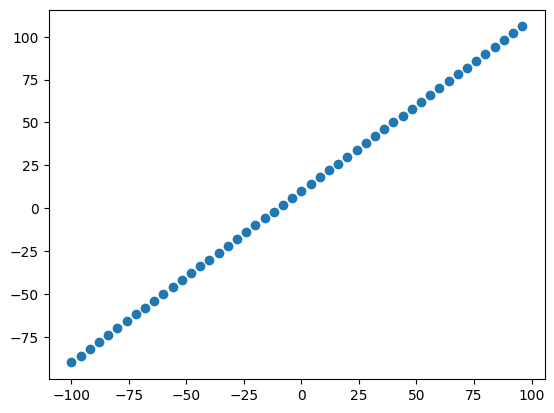

In [ ]:
#Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

###The 3 sets...
* **Training set**-the model learns from this data typically 70-80% of the data available.
* **Validation set**-the model gets tund on this data, which is typically 15-20% of data available.
* **Test set**-the model gets evaluated on this data to test what is has learned, thsi set is typically 15-20% of data available.

In [ ]:
#Check the length of the samples
len(X)

50

In [ ]:
#Spilt the data into train and test sets
X_train=X[:40]#First 40 training samples
y_train=y[:40]
X_test=X[40:]#Last 10 testing samples
y_test=y[40:]
len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

###Visualizing the data

Now we've got our data in training and test sets...lets visualize

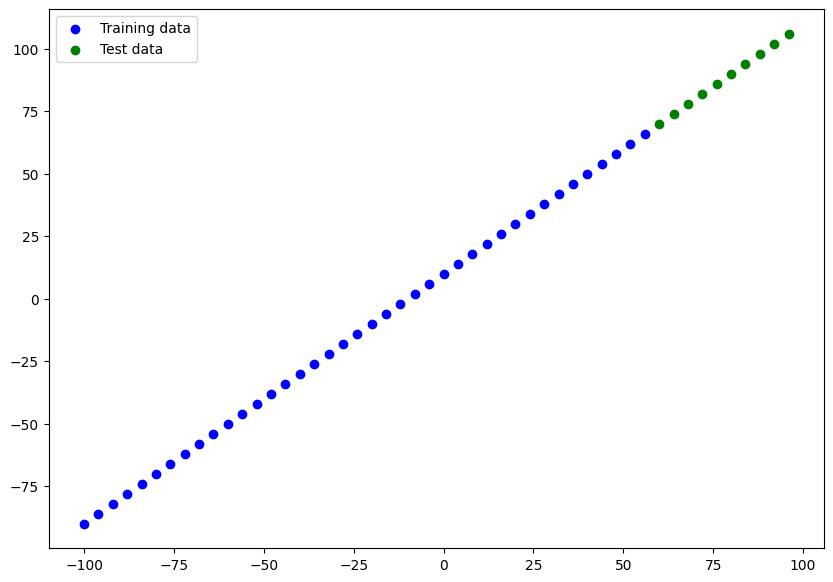

In [ ]:
plt.figure(figsize=(10,7))
#Plot training data in blue
plt.scatter(X_train,y_train,c="b",label="Training data")
#Plot test data in green
plt.scatter(X_test,y_test,c="g",label="Test data")
#Show a legend
plt.legend();

In [ ]:
#Lets have a look at how to build a neural network for our data

#1.Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2.Compile the model
model.compile(loss="mae",
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
#3.Fit the model
#model.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=100)

###Visualize the model

In [ ]:
#Lets create  a model which builds automatically bydefining the input_shape argument in the first layer
tf.random.set_seed(42)

#1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layers"),
    tf.keras.layers.Dense(1,name="output_layers")
    ],name="model_1")
#2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3.Fit the model
model.fit(x_train,y_train, epochs=100)

NameError: ignored

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (Dense)        (None, 10)                20        
                                                                 
 output_layers (Dense)       (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* **Total params**- total number of parameters in the model.
* **Trainable params** - these are paramters (patterns) the model can update as it trains
* **Non-trainable params** - these paramters aren't updated during training(this is typical when you bring in already learn pattern or parameters from other models during **transfer learning**)

In [ ]:
#Lets fit model to training data
model.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
#Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (Dense)        (None, 10)                20        
                                                                 
 output_layers (Dense)       (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


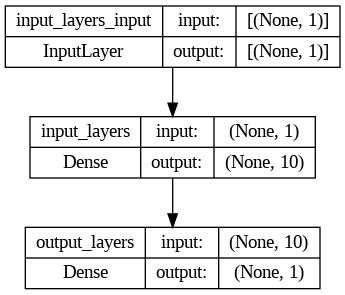

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

###Visualizing our models predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in form of y_test or y_true versus y_pred

In [ ]:
#Make some predictions
y_pred=model.predict(tf.expand_dims(X_test,axis=1))
y_pred

1/1 [==============================] - 0s 314ms/step


array([[ 69.532486],
       [ 74.05164 ],
       [ 78.57079 ],
       [ 83.08996 ],
       [ 87.609116],
       [ 92.128265],
       [ 96.647415],
       [101.16659 ],
       [105.68574 ],
       [110.20489 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#Built a plotting function
def plot_predictions(train_data=X_train,
              train_labels=y_train,
              test_data=X_test,
              test_labels=y_test,
              predictions=y_pred):
  """
  Plot training data, test data and compare predictions to ground true labels
  """
  plt.figure(figsize=(10,7))
  #Plot train data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  #Plot test data in green
  plt.scatter(test_data,test_labels,c="g",label="Test data")
  #Plot models predictions in red
  plt.scatter(test_data,predictions,c="r",label="predictions")
  #Show legends
  plt.legend();



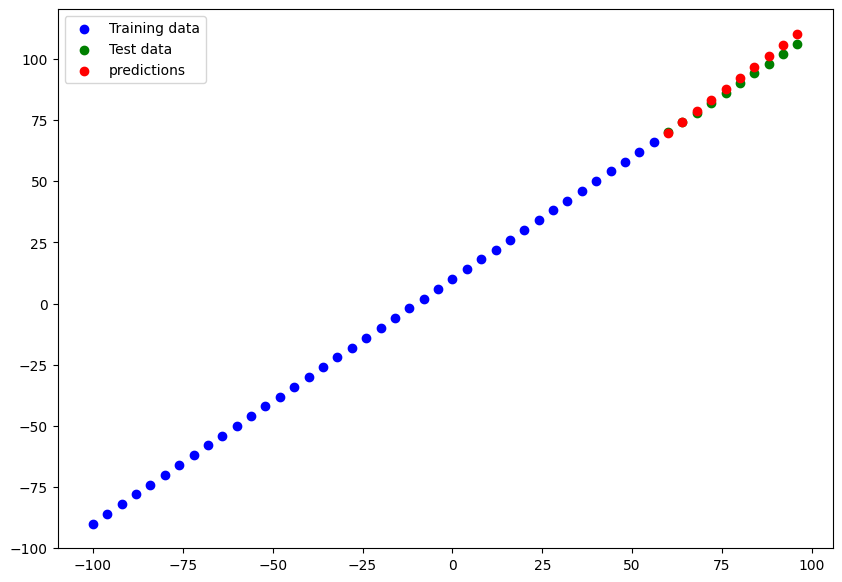

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

###Evaluation our model's predictions with regression evaluation

Depending on the problem you r working on there will be different evaluation matrix to evaluate model's performance

Since we're working on a regression, there are two of the main metrics:
* MAE-mean absolute error, "on average, ho wrong each of my model's preddictions"
* MSE-mean square error,"sqaure the average errors"

In [ ]:
#Evaluate the model on the test
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 258ms/step - loss: 1.9622 - mae: 1.9622


[1.9621918201446533, 1.9621918201446533]

In [ ]:
 #Calculate the mean square error
 mae=tf.metrics.mae(y_true=y_test,
                    y_pred=tf.squeeze(y_pred))
 mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.9621918>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.532486],
       [ 74.05164 ],
       [ 78.57079 ],
       [ 83.08996 ],
       [ 87.609116],
       [ 92.128265],
       [ 96.647415],
       [101.16659 ],
       [105.68574 ],
       [110.20489 ]], dtype=float32)>

In [ ]:
#Calculate the mae
mae=tf.metrics.mae(y_true=y_test,
                  y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.9621918>

In [ ]:
#Calculate the mean square error
mse=tf.metrics.mse(y_true=y_test,
                   y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=5.7155643>

In [ ]:
#Make some functions to reuse MAE and MSE
def mae(y_true,y_pred):
  return tf.metrics.mae(y_true=y_test,
                        y_pred=tf.squeeze(y_pred))
def mse(y_true,y_pred):
  return tf.metrics.mse(y_true=y_test,
                        y_pred=tf.squeeze(y_pred))


###Running experiments to imporove the model

```
Build a model->fit it->evaluate it->tweak it->fit it->....
```

1. Get more data - get more examples for your model to train on
2. Make your model larger(use more complex model)
3. Train for longer-give your model more chances to find patterns in data

Let's do 3 modelling experiments:

1. model_1-same as original model, 1 layer trained for 100 epochs
2. model_2-2 layers trained for 100 epochs
3. model_-2 layers, trained for 500 epochs

**Build model_1**

In [ ]:
#set random seed
tf.random.set_seed(42)

#1.Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2.Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
#Fit the model
model_1.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 36ms/step - loss: 34.9403 - mae: 34.9403
Epoch 2/500
2/2 [==============================] - 0s 17ms/step - loss: 9.9556 - mae: 9.9556
Epoch 3/500
2/2 [==============================] - 0s 14ms/step - loss: 11.4547 - mae: 11.4547
Epoch 4/500
2/2 [==============================] - 0s 12ms/step - loss: 9.4746 - mae: 9.4746
Epoch 5/500
2/2 [==============================] - 0s 20ms/step - loss: 10.3690 - mae: 10.3690
Epoch 6/500
2/2 [==============================] - 0s 12ms/step - loss: 9.6082 - mae: 9.6082
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 8.7199 - mae: 8.7199
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 9.0619 - mae: 9.0619
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 19.1158 - mae: 19.1158
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 10.3206 - mae: 10.3206
Epoch 11/500
2/2 [==============================] - 0s 10ms/

1/1 [==============================] - 0s 53ms/step


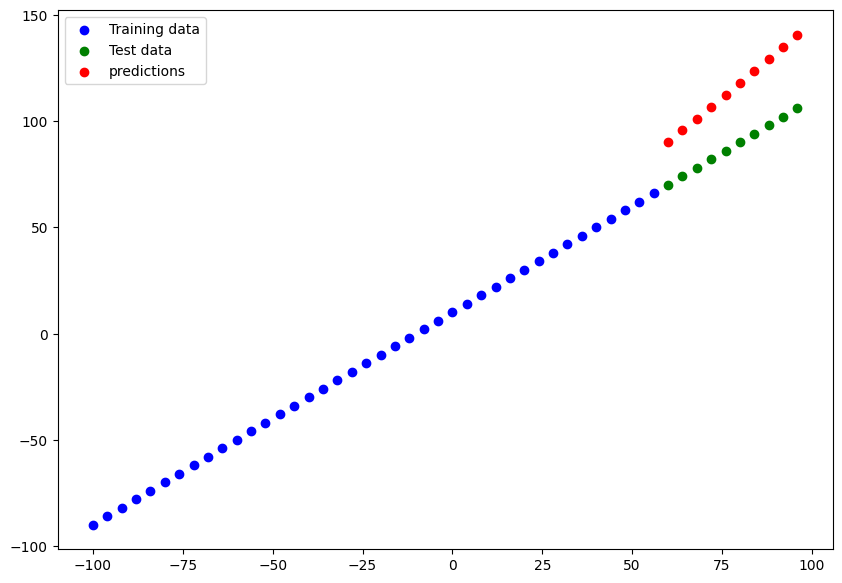

In [ ]:
#Make and plot prediction with model_1
y_pred_1=model_1.predict(X_test,)
plot_predictions(predictions=y_pred_1)

In [ ]:
#Calculate model_1 evaluation matrix
mae_1=mae(y_test,y_pred_1)
mse_1=mse(y_test,y_pred_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=27.354366>,
 <tf.Tensor: shape=(), dtype=float32, numpy=770.23425>)

**Build model_2**

*2 dense layers with 100 epochs*

In [ ]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 11ms/step - loss: 52.4408 - mse: 4292.2783
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 28.8778 - mse: 1090.0598
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 33.8298 - mse: 1722.7201
Epoch 4/500
2/2 [==============================] - 0s 13ms/step - loss: 28.1527 - mse: 1166.6936
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 15.3056 - mse: 299.1021
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 12.1547 - mse: 182.2756
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 11.4550 - mse: 159.4870
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.1957 - mse: 173.9676
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 41.7204 - mse: 2772.8738
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 28.9541 - mse: 1184.8403
Epoch 11/500
2/2 [=======================

1/1 [==============================] - 0s 116ms/step


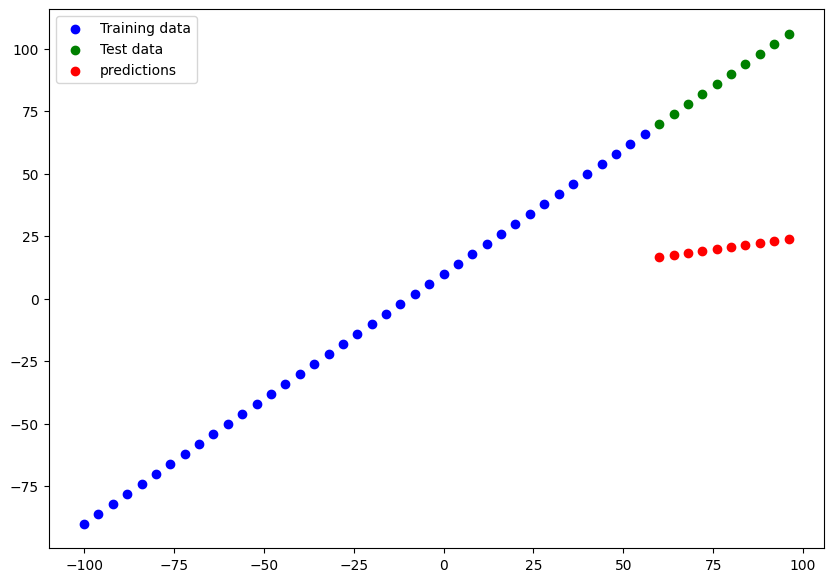

In [ ]:
#Make and plot prediction of model_2
y_pred_2=model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [ ]:
#Calculate model_2 evaluation metrices
mae_2=mae(y_test,y_pred_2)
mse_2=mse(y_test,y_pred_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=67.65029>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4660.6304>)

**Build model_3**

Train for 500 epochs

In [ ]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
model_3.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 12ms/step - loss: 55.1312 - mse: 4780.1758
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 34.5657 - mse: 1914.8854
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 23.3563 - mse: 798.2609
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 12.3097 - mse: 221.5326
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 15.0978 - mse: 287.9445
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 12.0025 - mse: 173.8730
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 11.3163 - mse: 154.8966
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1564 - mse: 165.8693
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 41.0137 - mse: 2664.9456
Epoch 10/500
2/2 [==============================] - 0s 12ms/step - loss: 28.3342 - mse: 1132.5955
Epoch 11/500
2/2 [=========================

1/1 [==============================] - 0s 115ms/step


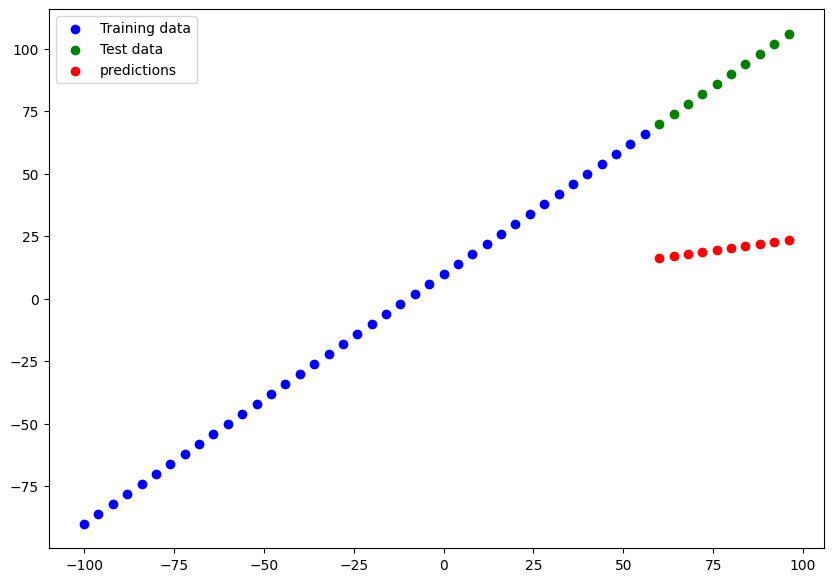

In [ ]:
#Make predictions and plot predictions
y_pred_3=model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [ ]:
#Calcualte evaluation matrics
mae_3=mae(y_test,y_pred_3)
mse_3=mse(y_test,y_pred_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.96311>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4703.491>)

###Comparing results of our experiments

 We've run a few experiments, lets compare our results

In [ ]:
#Lets compare our model's results using pandas Dataframe
import pandas as pd

model_results=[["model_1",mae_1.numpy(),mse_1.numpy()],
               ["model_2",mae_2.numpy(),mse_2.numpy()],
               ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results=pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,27.354366,770.234253
1,model_2,67.650291,4660.630371
2,model_3,67.963112,4703.491211


In [ ]:
model_2.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


##Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious while running lot of experiments

Luckily,there are tools to help
* TensorBoard-a component of tensor library to help track modelling experiments.
* Weights&Biases- a tool for tracking all kinds of machine learning experiments.

##Saving our models

Saving our models allows us to use them outside of GoogleColab such as web application or mobile app

There are two main formats to save our models

1. The save model format
2. The HDF5 format

In [ ]:
#Save the model using the SavedModel format
model_2.save("model_2SavedModelFormat")

In [ ]:
#Saave the model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")


##A larger example

In [ ]:
#Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Read in the insurance dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#Create X and y value(features and labels)
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]

In [ ]:
#View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
#View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
#Create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [ ]:
#Build a nueral network
tf.random.set_seed(42)

#1. Create a model
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model.compile(loss="mae",
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=["mae"])

#3.Fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8569.0029 - mae: 8569.0029
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7873.8569 - mae: 7873.8569
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7599.9697 - mae: 7599.9697
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7724.2188 - mae: 7724.2188
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7693.9785 - mae: 7693.9785
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7603.8765 - mae: 7603.8765
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7593.7310 - mae: 7593.7310
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7719.3086 - mae: 7719.3086
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7480.3105 - mae: 7480.3105
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7692.7422 - mae: 7692.7422

In [ ]:
#Check the results on test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7064.5874 - mae: 7064.5874


[7064.58740234375, 7064.58740234375]

In [ ]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well try and improve it

To improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use Adam optimizer
2. Same as abuve but train more longer

In [ ]:
X_train,y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2           1         0          1           0   
 1285   47  24.320         0           1         0          1           0   
 1142   52  24.860         0           1         0          1           0   
 969    39  34.320         5           1         0          1           0   
 486    54  21.470         3           1         0          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4           1         0          1           0   
 1130   39  23.870         5           1         0          1           0   
 1294   58  25.175         0           0         1          1           0   
 860    37  47.600         2           1         0          0           1   
 1126   55  29.900         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [ ]:
#Set random seed
tf.random.set_seed(42)
#1.Create the model
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#2.Compile our model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
#3.Fit the model
insurance_model_2.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13283.0957 - mae: 13283.0957
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13106.8018 - mae: 13106.8018
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12734.0146 - mae: 12734.0146
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12002.3047 - mae: 12002.3047
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10800.1680 - mae: 10800.1680
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9322.6924 - mae: 9322.6924
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8041.2842 - mae: 8041.2842
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7506.0991 - mae: 7506.0991
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7429.7617 - mae: 7429.7617
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7409.7827 - mae:

In [ ]:
 #Evaluate the lager model
 insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4793.4731 - mae: 4793.4731


[4793.47314453125, 4793.47314453125]

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7064.5874 - mae: 7064.5874


[7064.58740234375, 7064.58740234375]

In [ ]:
tf.random.set_seed(42)
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
history=insurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13309.1416 - mae: 13309.1416
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13186.8154 - mae: 13186.8154
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12920.6104 - mae: 12920.6104
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12365.7559 - mae: 12365.7559
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11368.0605 - mae: 11368.0605
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9949.5430 - mae: 9949.5430
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8487.2637 - mae: 8487.2637
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7615.6538 - mae: 7615.6538
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7431.2012 - mae: 7431.2012
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7406.4937 - mae:

In [ ]:
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3504.0186 - mae: 3504.0186


[3504.0185546875, 3504.0185546875]

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7064.5874 - mae: 7064.5874


[7064.58740234375, 7064.58740234375]

Text(0.5, 0, 'epochs')

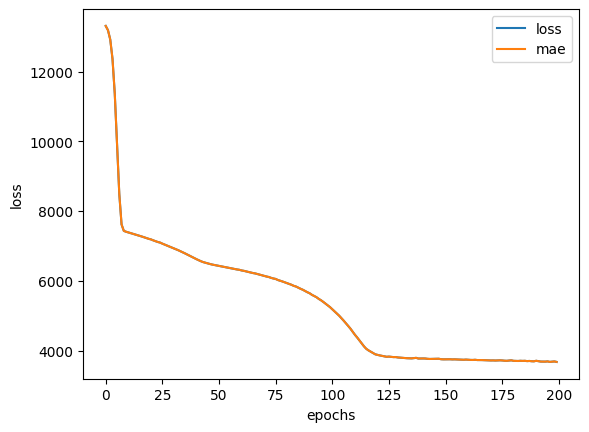

In [ ]:
#Plot history also known as training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

##How long should a model be trained

It depends.Really.. it depends on the problem you're working on. Howeber, many people have asked this question before... so TensorFlow has a solution! It's call the EarlyStopping Callback, which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

##Preprocessing data(normalization and standardization)

In terms of scaling values, neural networks prefer normalization.

If you're not sure which to use, you could try both and see which performs best.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#Read insurance dataframe
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borow a few classes from Scikit-Leran

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),#turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

#Create X and y values
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

#Create train and test sets
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization(MinMaxScaler) and OneHotEncoder
X_train_n=ct.transform(X_train)
X_test_n=ct.transform(X_test)

In [ ]:
#What does our data look like now
X_train_n[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape,X_train_n.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded.
Now build a neural network model for this normalized data

In [ ]:
#Set random seeds
tf.random.set_seed(42)

#1.Create a model
insurance_m=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.Compile our models
insurance_m.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

#3.Fit our model
insurance_m.fit(X_train_n,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.5508 - mae: 13343.5508
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13334.1660 - mae: 13334.1660
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13311.1719 - mae: 13311.1719
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13263.5000 - mae: 13263.5000
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13180.2607 - mae: 13180.2607
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13050.4990 - mae: 13050.4990
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12863.5654 - mae: 12863.5654
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12609.2988 - mae: 12609.2988
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 12277.6670 - mae: 12277.6670
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 11866.46

In [ ]:
#Evaluate our model trained on normalized data
insurance_m.evaluate(X_test_n,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3435.8564 - mae: 3435.8564


[3435.8564453125, 3435.8564453125]